<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/MLSST_MCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astro-datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.9-py3-none-any.whl size=15986 sha256=f1aa3d5af690beec8748f04adf211bf9360fefff8856f6b3c56fcd982bc5684e
  Stored in directory: /root/.cache/pip/wheels/77/11/df/7eb516aa333b47883b39adabbe38508a09163be741b476dcda
Successfully built astro-datasets


In [ ]:
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow as tf
import numpy as np
import os
import astro_datasets
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
ds_train_Y10, info_train_Y10 = tfds.load(name='mlsst/Y10', split='train', with_info=True, as_supervised=True, batch_size=50)
ds_valid_Y10, info_valid_Y10 = tfds.load(name='mlsst/Y10', split='validation', with_info=True, as_supervised=True, batch_size=50)
ds_test_Y10, info_test_Y10 = tfds.load(name='mlsst/Y10', split='test', with_info=True, as_supervised=True, batch_size=50)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.0.incompleteYMOCWN/mlsst-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.0.incompleteYMOCWN/mlsst-validation.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.0.incompleteYMOCWN/mlsst-test.tfrecord*...:   0%|          | 0/6…

Dataset mlsst downloaded and prepared to ~/tensorflow_datasets/mlsst/Y10/1.0.0. Subsequent calls will reuse this data.


tf.Tensor(
[2 0 2 0 2 1 0 0 2 0 2 2 1 2 1 0 2 1 0 2 2 0 2 2 2 2 2 1 1 2 2 2 2 0 2 2 0
 0 2 1 2 2 0 0 0 1 0 1 1 1], shape=(50,), dtype=int64)


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: RuntimeWarning: overflow encountered in double_scalars
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:455: RuntimeWarning: invalid value encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: overflow encountered in double_scalars
  resdat /= (vmax - vmin)


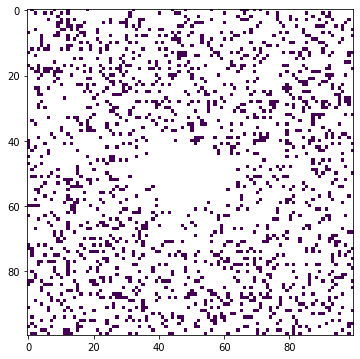

tf.Tensor(
[0 2 0 2 0 0 2 0 1 0 0 1 1 1 2 2 0 2 1 0 0 0 2 2 1 0 2 2 0 2 0 1 0 2 0 2 0
 0 2 0 1 1 2 2 2 2 0 2 0 1], shape=(50,), dtype=int64)


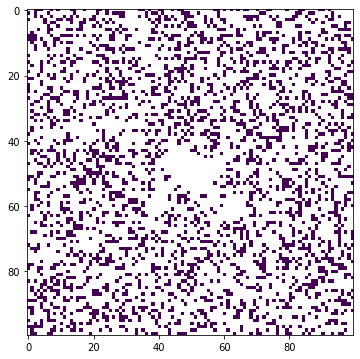

In [ ]:
for d in ds_train_Y10.take(2):
  inputs, label = d
  print(label)
  plt.figure(figsize=(6,6))
  plt.imshow(tf.math.sinh(inputs[0,:,:,0]))
  plt.show()

In [ ]:

def normalize(image, label):  
  image = tf.math.asinh(image)
  return image, label



ds_train_Y10 = ds_train_Y10.map(normalize)
ds_valid_Y10 = ds_valid_Y10.map(normalize)
ds_test_Y10 = ds_test_Y10.map(normalize)

In [ ]:
class MonteCarloDropout(tf.keras.layers.Dropout):
     def call(self, inputs):
         return super().call(inputs, training=True)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1, padding = 'same', input_shape=(100, 100, 3)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(1, 1)),
    MonteCarloDropout(0.1),
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, padding = 'same'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(1, 1)),
    MonteCarloDropout(0.1),
    tf.keras.layers.Conv2D(26, kernel_size=5, strides=1, padding = 'same'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(1, 1)),
    MonteCarloDropout(0.1),
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, padding = 'same'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(1, 1)),
    tf.keras.layers.Flatten(),
    MonteCarloDropout(0.1),
    tf.keras.layers.Dense(120),
    tf.keras.layers.ReLU(),
    MonteCarloDropout(0.1),
    tf.keras.layers.Dense(84),
    tf.keras.layers.ReLU(),
    MonteCarloDropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
    ])

In [ ]:
#model.summary()

In [ ]:
loss=tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=5e-5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.95, patience=3)

In [ ]:
model.compile(optimizer=opt,
              loss=loss,
              metrics='accuracy')

In [ ]:
checkpoint_path = "mlsst/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=False,
                                                  monitor='val_loss',
                                                  mode='min',
                                                  verbose=1,
                                                  save_best_only=True)

In [ ]:
model.fit(ds_train_Y10, epochs=100, callbacks=[reduce_lr, cp_callback], validation_data=ds_valid_Y10)

Epoch 1/100
470/470 [==============================] - ETA: 0s - loss: 1.0566 - accuracy: 0.5115
Epoch 1: val_loss improved from inf to 0.89570, saving model to mlsst/cp.ckpt
INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


470/470 [==============================] - 61s 101ms/step - loss: 1.0566 - accuracy: 0.5115 - val_loss: 0.8957 - val_accuracy: 0.5779 - lr: 5.0000e-05
Epoch 2/100
470/470 [==============================] - ETA: 0s - loss: 0.8574 - accuracy: 0.6025
Epoch 2: val_loss improved from 0.89570 to 0.86240, saving model to mlsst/cp.ckpt
INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


470/470 [==============================] - 84s 179ms/step - loss: 0.8574 - accuracy: 0.6025 - val_loss: 0.8624 - val_accuracy: 0.6003 - lr: 5.0000e-05
Epoch 3/100
470/470 [==============================] - ETA: 0s - loss: 0.7136 - accuracy: 0.6851
Epoch 3: val_loss improved from 0.86240 to 0.79778, saving model to mlsst/cp.ckpt
INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


470/470 [==============================] - 61s 129ms/step - loss: 0.7136 - accuracy: 0.6851 - val_loss: 0.7978 - val_accuracy: 0.6507 - lr: 5.0000e-05
Epoch 4/100
470/470 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.7596
Epoch 4: val_loss improved from 0.79778 to 0.78269, saving model to mlsst/cp.ckpt
INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


INFO:tensorflow:Assets written to: mlsst/cp.ckpt/assets


470/470 [==============================] - 84s 179ms/step - loss: 0.5735 - accuracy: 0.7596 - val_loss: 0.7827 - val_accuracy: 0.6724 - lr: 5.0000e-05
Epoch 5/100
470/470 [==============================] - ETA: 0s - loss: 0.4671 - accuracy: 0.8100
Epoch 5: val_loss did not improve from 0.78269
470/470 [==============================] - 42s 88ms/step - loss: 0.4671 - accuracy: 0.8100 - val_loss: 0.9698 - val_accuracy: 0.6718 - lr: 5.0000e-05
Epoch 6/100
470/470 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.8485
Epoch 6: val_loss did not improve from 0.78269
470/470 [==============================] - 43s 91ms/step - loss: 0.3808 - accuracy: 0.8485 - val_loss: 0.9185 - val_accuracy: 0.6823 - lr: 5.0000e-05
Epoch 7/100
470/470 [==============================] - ETA: 0s - loss: 0.3048 - accuracy: 0.8790
Epoch 7: val_loss did not improve from 0.78269
470/470 [==============================] - 41s 88ms/step - loss: 0.3048 - accuracy: 0.8790 - val_loss: 0.8240 - val_a

In [ ]:
new_model = tf.keras.models.load_model('mlsst/cp.ckpt')

In [ ]:
for _ in range(10):
  correct, n = 0, 0
  for (x, y) in ds_test_Y10:
    yhat = new_model.predict(x)
    correct += np.sum(np.argmax(yhat, axis=-1) == y)
    n += len(y)
  print('Accuracy:',correct / n)

Accuracy: 0.6583767684288906
Accuracy: 0.6641846612062546
Accuracy: 0.6521221146686522
Accuracy: 0.6542069992553984
Accuracy: 0.6533134772896501
Accuracy: 0.6540580789277737
Accuracy: 0.6589724497393894
Accuracy: 0.6626954579300074
Accuracy: 0.662397617274758
Accuracy: 0.6583767684288906


In [ ]:
samples_iter = 200
softmax = []

for _ in range(samples_iter):
  s = []
  for (x, y) in ds_test_Y10:
    pred = new_model.predict(x)
    #softmax.append(pred)
    s.append(pred)
  s = np.concatenate(s)
  softmax.append(s)

softmax = np.array(softmax)



def entropy_MI(softmax, samples_iter):

    class_0 = softmax[:][0]
    class_1 = softmax[:][1]
    class_2 = softmax[:][2]
    #biased estimator of predictive entropy, bias will reduce as samples_iter is increased
    predictive_entropy = -((np.sum(class_0)/samples_iter) * np.log(np.sum(class_0)/samples_iter) + (np.sum(class_1)/samples_iter) * np.log(np.sum(class_1)/samples_iter)
                          + (np.sum(class_2)/samples_iter) * np.log(np.sum(class_2)/samples_iter))
    
    #Orignal: -((np.sum(class_0)/samples_iter) * np.log(np.sum(class_0)/samples_iter) + (np.sum(class_1)/samples_iter) * np.log(np.sum(class_1)/samples_iter))
    

    mutual_info = predictive_entropy + np.sum((class_0 * np.log(class_0)) + (class_1 * np.log(class_1)) + (class_2 * np.log(class_2)))/samples_iter

    #Original: predictive_entropy + np.sum(class_0*np.log(class_0))/samples_iter +  np.sum(class_1*np.log(class_1))/samples_iter
    
    #entropy of a single pass
    class0 = softmax[:][0][0]
    class1 = softmax[:][1][0]
    class2 = softmax[:][2][0]
    entropy_singlepass = -np.sum((class0 * np.log(class0)) + (class1 * np.log(class1)) + (class2 * np.log(class2)))/samples_iter

    #Original: -(class0 * np.log(class0) + class1 * np.log(class1))

    #print("Entropy of a single pass:", entropy_singlepass)
    return predictive_entropy, mutual_info, entropy_singlepass



predictive_entropy, mutual_info, entropy_singlepass = entropy_MI(softmax, samples_iter)


print("Predictive Entropy:", predictive_entropy)
print("Mutual Information:", mutual_info)
print("Entropy of a single pass:", entropy_singlepass)

Predictive Entropy: -353.92566600417706
Mutual Information: -418.84910350417704
Entropy of a single pass: 0.011047447919845582


In [ ]:
ds_test_Y1, info_test_Y1 = tfds.load(name='mlsst/Y1', split='test', with_info=True, as_supervised=True, batch_size=50)
ds_test_Y1 = ds_test_Y1.map(normalize)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyboardInterrupt: ignored

In [ ]:
for _ in range(10):
  correct, n = 0, 0
  for (x, y) in ds_test_Y1:
    yhat = new_model.predict(x)
    correct += np.sum(np.argmax(yhat, axis=-1) == y)
    n += len(y)
  print('Accuracy:',correct / n)

In [ ]:
samples_iter = 200
softmax = []

for _ in range(samples_iter):
  s = []
  for (x, y) in ds_test_Y1:
    pred = new_model.predict(x)
    #softmax.append(pred)
    s.append(pred)
  s = np.concatenate(s)
  softmax.append(s)

softmax = np.array(softmax)


predictive_entropy, mutual_info, entropy_singlepass = entropy_MI(softmax, samples_iter)


print("Predictive Entropy:", predictive_entropy)
print("Mutual Information:", mutual_info)
print("Entropy of a single pass:", entropy_singlepass)